## Group Project Part 2
(Deadline 13.11.2023 CET 23:59)

### Project Title: Building a Smart Business Manager with APIs

### Step 3: Decision Making (30 points)
Clean all the data you collected
Combine the data you've collected from the weather and non-meteorological APIs to make informed decisions about the business  stand. 
Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

**Task 3.1:** Location Selection (15 points)
Determine where to set up your business stand based on weather conditions, local attractions, or events. 
The location should maximize customer traffic and sales.
Support your decision with descriptive statistics and basic data visualization.

**Task 3.2:** Inventory Management (15 points)
Based on weather forecasts and expected sales, decide how much inventory to carry.
Ensure you have enough ingredients on busy days, but minimize waste on slower days.


**3.1**

In [73]:
import requests
import pandas as pd
data=pd.read_csv('rooftop_data.csv')
data.dropna(inplace=True)
price_evaluation=[]
for i in data['price range']:
    if (len(i))==1:
        price_evaluation.append("inexpensive")
    elif (len(i))==2:
        price_evaluation.append("moderate")
    elif (len(i))==3:
        price_evaluation.append("expensive")
    else:
        price_evaluation.append("luxury")       
data["price evaluation"]=price_evaluation
data

,name,latitude,longtitude,rating,review count,price range,city,price evaluation
0,Klunkerkranich,52.482160,13.431854,4.3,122,€€,Berlin,moderate
3,Monkey Bar,52.505377,13.336890,3.3,164,€€€,Berlin,expensive
4,Bebel Bar & Lounge,52.515790,13.394244,4.0,17,€€€€,Berlin,luxury
5,Soho House,52.527609,13.415473,3.8,88,€€€,Berlin,expensive
6,Deck 5,52.549561,13.415130,3.6,109,€€,Berlin,moderate
7,Weekend Club,52.523080,13.416489,3.1,114,€€€,Berlin,expensive
8,The Circus,52.529403,13.401310,4.5,35,€€,Berlin,moderate
9,Amano Rooftop Bar,52.528246,13.402823,3.8,21,€€€,Berlin,expensive
10,The Exchange,40.037094,-76.305147,3.6,143,$$,Manheim,moderate
11,The Sandwich Factory Sports Lounge,40.095272,-76.305423,3.2,83,$,Manheim,inexpensive


In [74]:
a=data[data['city']=="Manheim"]
b=data[data['city']=="Berlin"]
c=data[data['city']=="Frankfurt"]
data[["rating","review count"]].describe()

,rating,review count
count,17.000000,17.000000
mean,3.547059,93.352941
std,0.511270,48.359256
min,2.400000,17.000000
25%,3.200000,77.000000
50%,3.600000,96.000000
75%,3.800000,122.000000
max,4.500000,167.000000


C:\Users\30694\AppData\Local\Temp\ipykernel_6396\1181445827.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\30694\AppData\Local\Temp\ipykernel_6396\1181445827.py:10: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



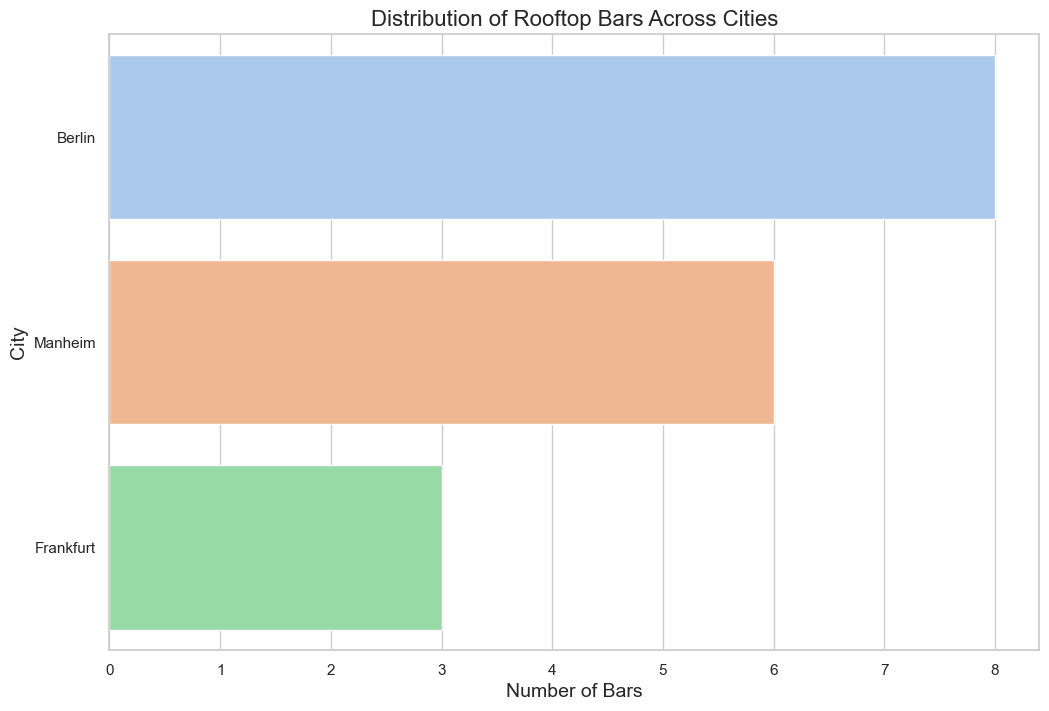

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  

colors = sns.color_palette("pastel")


sns.countplot(y='city', data=data, palette=colors)

plt.title('Distribution of Rooftop Bars Across Cities', fontsize=16)
plt.xlabel('Number of Bars', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()


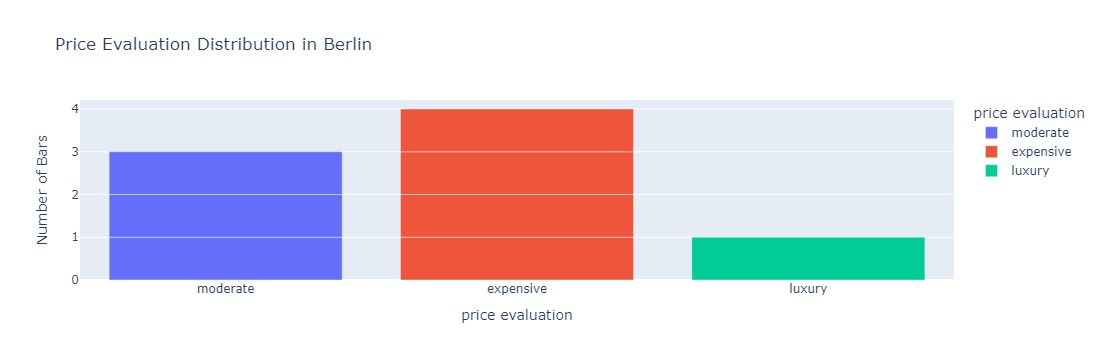

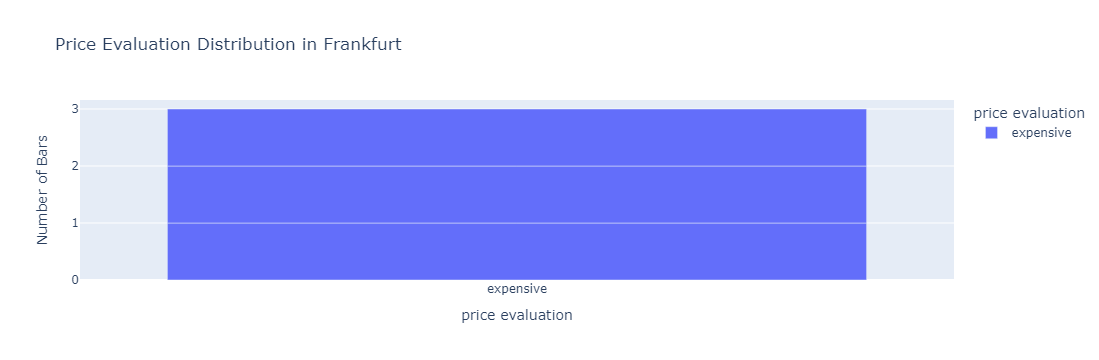

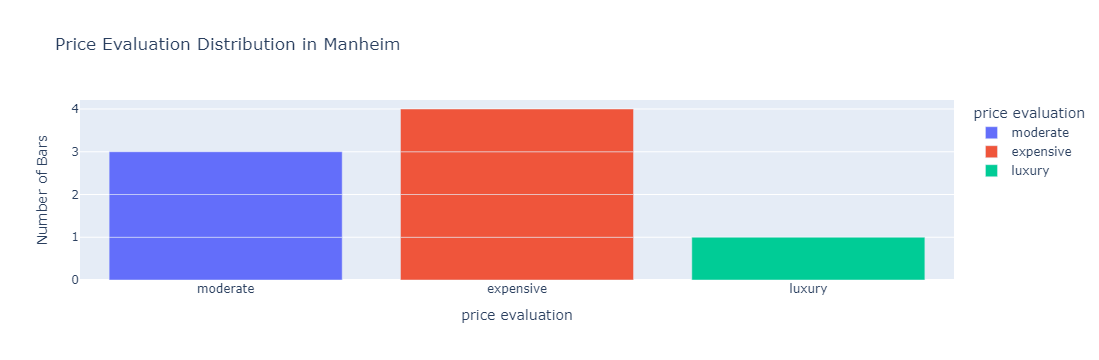

In [76]:
import plotly.express as px

berlin_data = data[data['city'] == 'Berlin']
fig1 = px.bar(berlin_data, x='price evaluation', color='price evaluation', title='Price Evaluation Distribution in Berlin')
fig1.update_layout(yaxis_title='Number of Bars')
fig1.show()
Frankfurt_data = data[data['city'] == 'Frankfurt']
fig2 = px.bar(Frankfurt_data, x='price evaluation', color='price evaluation', title='Price Evaluation Distribution in Frankfurt')
fig2.update_layout(yaxis_title='Number of Bars')
fig2.show()
Manheim_data = data[data['city'] == 'Berlin']
fig3 = px.bar(Manheim_data, x='price evaluation', color='price evaluation', title='Price Evaluation Distribution in Manheim')
fig3.update_layout(yaxis_title='Number of Bars')
fig3.show()


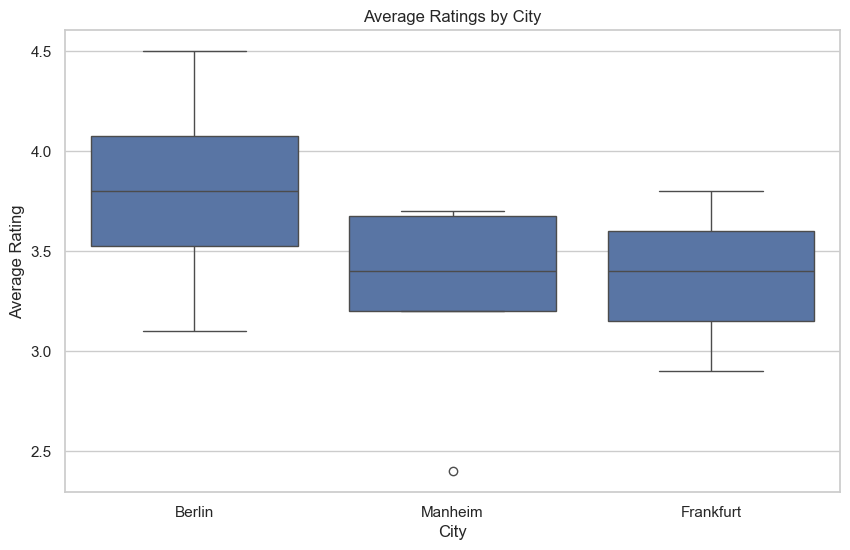

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='rating', data=data)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()


Enter the starting date (yyyy-mm-dd):  2023-06-01
Enter the ending date (yyyy-mm-dd):  2023-06-10


It is less competitive at Manheim


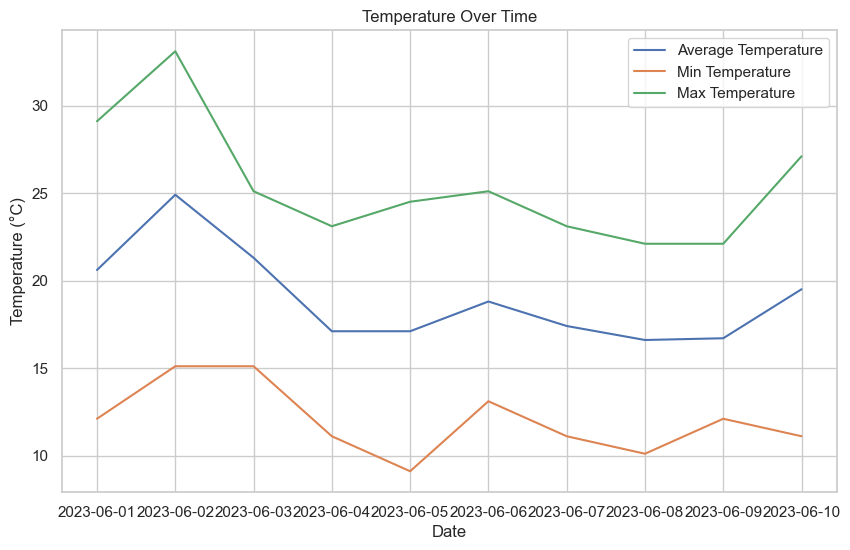

You can open on 2023-06-01
You can open on 2023-06-02
You can open on 2023-06-03
You can open on 2023-06-04
You can open on 2023-06-05
Do not open today 2023-06-06, it's raining
You can open on 2023-06-07
You can open on 2023-06-08
You can open on 2023-06-09
You can open on 2023-06-10


In [78]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

date_str1 = input("Enter the starting date (yyyy-mm-dd): ")
date_str2 = input("Enter the ending date (yyyy-mm-dd): ")

a=data[data['city']=="Manheim"]
b=data[data['city']=="Berlin"]
c=data[data['city']=="Frankfurt"]
avg_Manheim=a['rating'].mean()
avg_Berlin=b['rating'].mean()
avg_Frankfurt=c['rating'].mean()
total_averages={'cities':["Manheim","Berlin","Frankfurt"],'average rating':[avg_Manheim,avg_Berlin,avg_Frankfurt]}
avg=pd.DataFrame(total_averages)
min_city=avg.loc[avg['average rating'].idxmin(),'cities']
print(f"It is less competitive at {min_city}")

def weather_by_day(min_city,date_str1,date_str2):
    if min_city=="Berlin":
        lat=52
        lon=13
    elif min_city=="Manheim":
        lat=40
        lon=-76
    elif min_city=="Frankfurt":
        lat=50
        lon=8

    date_format = "%Y-%m-%d"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)
    days_difference = (date2 - date1).days
    url = "https://meteostat.p.rapidapi.com/point/daily"

    querystring = {"lat":lat,"lon":lon,"start":date_str1,"end":date_str2,"alt":"184"}

    headers = {
    	"X-RapidAPI-Key": "647624aa1dmsh656f4c5b5e614f8p10bc1djsn052c2e87053a",
    	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    weather_data=[]
    for i in range(days_difference+1): 
        weather_data.append([response.json()['data'][i]])

    list = [item for sublist in weather_data for item in sublist]
    df=pd.DataFrame(list)
    df

    list = [item for sublist in weather_data for item in sublist]
    df=pd.DataFrame(list)
    df

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='tavg', data=df, label='Average Temperature')
    sns.lineplot(x='date', y='tmin', data=df, label='Min Temperature')
    sns.lineplot(x='date', y='tmax', data=df, label='Max Temperature')

    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()
    
    for index, row in df.iterrows():
        if row['prcp'] > 1:
            print(f"Do not open today {row['date']}, it's raining")
            open = False
        elif row['tavg'] < 5:
            print(f"Do not open on {row['date']}, it's too cold")
            open = False
        else:
            print(f"You can open on {row['date']}")
            open = True
    
    return df
DF=weather_by_day(min_city,date_str1,date_str2)   


**We end up choosing Manheim as the location because it has the worst rating for rooftop bars and choose what days to open based on the weather. Also the price evaluation distribution varies in this city so we can set prices that represent a diverse customer base**



In [79]:
avg_Manheim=a['rating'].mean()
avg_Berlin=b['rating'].mean()
avg_Frankfurt=c['rating'].mean()
total_averages={'cities':["Manheim","Berlin","Frankfurt"],'average rating':[avg_Manheim,avg_Berlin,avg_Frankfurt]}
avg=pd.DataFrame(total_averages)
avg

,cities,average rating
0,Manheim,3.300000
1,Berlin,3.800000
2,Frankfurt,3.366667


In [80]:
DF[['tavg','date']]


,tavg,date
0,20.6,2023-06-01
1,24.9,2023-06-02
2,21.3,2023-06-03
3,17.1,2023-06-04
4,17.1,2023-06-05
5,18.8,2023-06-06
6,17.4,2023-06-07
7,16.6,2023-06-08
8,16.7,2023-06-09
9,19.5,2023-06-10


**3.2**

In [81]:
city=min_city
standard_sales_at_20_degrees=int(input("input the sales at 20 degrees"))
def inv_management(min_city):
    temp_difference=round(DF['tavg']-20)
    inventory_change=temp_difference*0.03
    updated_inventory=standard_sales_at_20_degrees*(1+inventory_change)
    inventory_df = DF[['tavg', 'date']].copy()
    inventory_df['updated_inventory'] = updated_inventory
    return "you're new inventory for the requested period is based on the average temperature is", inventory_df

inv_management(min_city)


input the sales at 20 degrees 100


("you're new inventory for the requested period is based on the average temperature is",
    tavg        date  updated_inventory
 0  20.6  2023-06-01              103.0
 1  24.9  2023-06-02              115.0
 2  21.3  2023-06-03              103.0
 3  17.1  2023-06-04               91.0
 4  17.1  2023-06-05               91.0
 5  18.8  2023-06-06               97.0
 6  17.4  2023-06-07               91.0
 7  16.6  2023-06-08               91.0
 8  16.7  2023-06-09               91.0
 9  19.5  2023-06-10              100.0)

The expected sales will be incereased by 3% for every degree above 20 and decreased by 3% for every degree below 20 and accordingly we increse or decrease or inventory

